## Importing Preprocessed Dataset

In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [73]:
stroke_data = pd.read_csv('dataset/preprocessed_stroke_data.csv')

In [74]:
stroke_data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,228.69,36.6,smoker,1
1,Female,61.0,0,0,Yes,Self Employed,202.21,28.1,non-smoker,1
2,Male,80.0,0,1,Yes,Private,105.92,32.5,non-smoker,1
3,Female,49.0,0,0,Yes,Private,171.23,34.4,smoker,1
4,Female,79.0,1,0,Yes,Self Employed,174.12,24.0,non-smoker,1


In [75]:
stroke_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   avg_glucose_level  5110 non-null   float64
 7   bmi                5110 non-null   float64
 8   smoking_status     5110 non-null   object 
 9   stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 399.3+ KB


In [76]:
stroke_data.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000
mean,43.226614,0.097456,0.054012,106.147677,28.862035,0.048728
std,22.612647,0.296607,0.226063,45.283560,7.699562,0.215320
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.245000,23.800000,0.000000
50%,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,114.090000,32.800000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


## Dataset Overview
- Data contains 4 Categorial Features
    - `gender`
    - `hypertension`
    - `heart_disease`
    - `ever_married`
- Data contains 6 Numerical Features
    - `age`
    - `avg_glucose_level`
    - `bmi`
    - `stroke`
    - `work_type`
    - `residence_type`
- Target Variable: `stroke`

## Data Scaling
- Numerical features are scaled using `StandardScaler` to ensure that they have a mean of 0 and a standard deviation of 1.
- Categorical features are encoded using `LabelEncoder` to convert them into a format suitable for machine learning algorithms.
- First we should do train-test split to avoid data leakage.


In [77]:
from sklearn.model_selection import train_test_split
X = stroke_data.drop('stroke', axis=1)
y = stroke_data['stroke']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)



In [78]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((3832, 9), (1278, 9), (3832,), (1278,))

In [79]:
X_train

,gender,age,hypertension,heart_disease,ever_married,work_type,avg_glucose_level,bmi,smoking_status
837,Female,39.0,0,0,No,Government Job,79.44,22.7,non-smoker
2899,Male,55.0,0,0,Yes,Private,68.79,27.0,non-smoker
708,Female,59.0,0,0,Yes,Private,240.71,43.9,smoker
3144,Female,79.0,0,0,No,Self Employed,82.07,30.4,Unknown
4920,Female,75.0,0,0,Yes,Private,68.38,33.8,Unknown
...,...,...,...,...,...,...,...,...,...
1434,Female,45.0,0,0,Yes,Private,92.86,35.1,smoker
461,Female,16.0,0,0,No,Children,113.47,19.5,Unknown
1052,Female,61.0,0,0,Yes,Private,78.65,36.2,smoker
1757,Male,31.0,0,0,Yes,Private,74.05,26.0,Unknown


In [80]:
X_test

,gender,age,hypertension,heart_disease,ever_married,work_type,avg_glucose_level,bmi,smoking_status
1602,Female,62.0,0,0,Yes,Government Job,73.44,23.4,Unknown
2966,Male,80.0,1,0,Yes,Self Employed,232.12,28.8,non-smoker
1433,Male,54.0,0,0,Yes,Private,86.26,35.1,smoker
2738,Female,43.0,0,0,Yes,Private,110.42,32.6,smoker
916,Male,63.0,0,0,Yes,Private,57.82,28.8,smoker
...,...,...,...,...,...,...,...,...,...
1936,Female,28.0,0,0,No,Private,75.53,34.9,non-smoker
4859,Male,43.0,0,0,Yes,Private,66.22,34.4,Unknown
4701,Male,50.0,0,0,Yes,Private,120.44,30.3,non-smoker
1834,Male,37.0,0,0,No,Private,90.95,24.6,smoker


In [81]:
y_train

837     0
2899    0
708     0
3144    0
4920    0
       ..
1434    0
461     0
1052    0
1757    0
5052    0
Name: stroke, Length: 3832, dtype: int64

In [82]:
y_test

1602    0
2966    0
1433    0
2738    0
916     0
       ..
1936    0
4859    0
4701    0
1834    0
2441    0
Name: stroke, Length: 1278, dtype: int64

In [83]:
y_train.value_counts()

stroke
0    3645
1     187
Name: count, dtype: int64

In [84]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()
numerical_cols = X_train_scaled.select_dtypes(exclude='object').columns
categorical_cols = X_train_scaled.select_dtypes(include='object').columns
scaler = StandardScaler()
X_train_scaled[numerical_cols] = scaler.fit_transform(X_train_scaled[numerical_cols])
X_test_scaled[numerical_cols] = scaler.transform(X_test_scaled[numerical_cols])
gender_le = LabelEncoder()
X_train_scaled['gender'] = gender_le.fit_transform(X_train_scaled['gender'])
X_test_scaled['gender'] = gender_le.transform(X_test_scaled['gender'])
work_type_le = LabelEncoder()
X_train_scaled['work_type'] = work_type_le.fit_transform(X_train_scaled['work_type'])
X_test_scaled['work_type'] = work_type_le.transform(X_test_scaled['work_type'])
ever_married_le = LabelEncoder()
X_train_scaled['ever_married'] = gender_le.fit_transform(X_train_scaled['ever_married'])
X_test_scaled['ever_married'] = gender_le.transform(X_test_scaled['ever_married'])
smoking_status_le = LabelEncoder()
X_train_scaled['smoking_status'] = smoking_status_le.fit_transform(X_train_scaled['smoking_status'])
X_test_scaled['smoking_status'] = smoking_status_le.transform(X_test_scaled['smoking_status'])

from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train_scaled,y_train = smote.fit_resample(X_train_scaled, y_train)

In [85]:
y_train.value_counts()

stroke
0    3645
1    3645
Name: count, dtype: int64

In [86]:
X_train_scaled

,gender,age,hypertension,heart_disease,ever_married,work_type,avg_glucose_level,bmi,smoking_status
0,0,-0.191092,-0.326428,-0.237127,0,1,-0.589808,-0.797830,1
1,1,0.517940,-0.326428,-0.237127,1,3,-0.827422,-0.240480,1
2,0,0.695198,-0.326428,-0.237127,1,3,3.008316,1.950034,2
3,0,1.581487,-0.326428,-0.237127,0,4,-0.531129,0.200215,0
4,0,1.404229,-0.326428,-0.237127,1,3,-0.836569,0.640910,0
...,...,...,...,...,...,...,...,...,...
7285,1,1.246891,-0.326428,4.217145,1,3,3.171089,0.258516,2
7286,1,0.825286,3.063466,-0.237127,1,3,2.671963,0.962652,1
7287,0,0.443334,-0.326428,-0.237127,1,1,-0.322969,0.178722,2
7288,0,1.445516,-0.326428,-0.237127,1,4,2.639611,-0.259184,1


In [87]:
X_test_scaled

,gender,age,hypertension,heart_disease,ever_married,work_type,avg_glucose_level,bmi,smoking_status
1602,0,0.828141,-0.326428,-0.237127,1,1,-0.723675,-0.707098,0
2966,1,1.625801,3.063466,-0.237127,1,4,2.816663,-0.007171,1
1433,1,0.473625,-0.326428,-0.237127,1,3,-0.437645,0.809411,2
2738,0,-0.013834,-0.326428,-0.237127,1,3,0.101393,0.485371,2
916,1,0.872455,-0.326428,-0.237127,1,3,-1.072175,-0.007171,2
...,...,...,...,...,...,...,...,...,...
1936,0,-0.678551,-0.326428,-0.237127,0,3,-0.677044,0.783488,1
4859,1,-0.013834,-0.326428,-0.237127,1,3,-0.884761,0.718680,0
4701,1,0.296368,-0.326428,-0.237127,1,3,0.324951,0.187253,1
1834,1,-0.279720,-0.326428,-0.237127,0,3,-0.333006,-0.551559,2


In [88]:
import pickle
pickle.dump(scaler, open('models/scaler.pkl', 'wb'))
pickle.dump(gender_le, open('models/gender_le.pkl', 'wb'))
pickle.dump(work_type_le, open('models/work_type_le.pkl', 'wb'))
pickle.dump(ever_married_le, open('models/ever_married_le.pkl', 'wb'))
pickle.dump(smoking_status_le, open('models/smoking_status_le.pkl', 'wb'))

## Box Plot Analysis

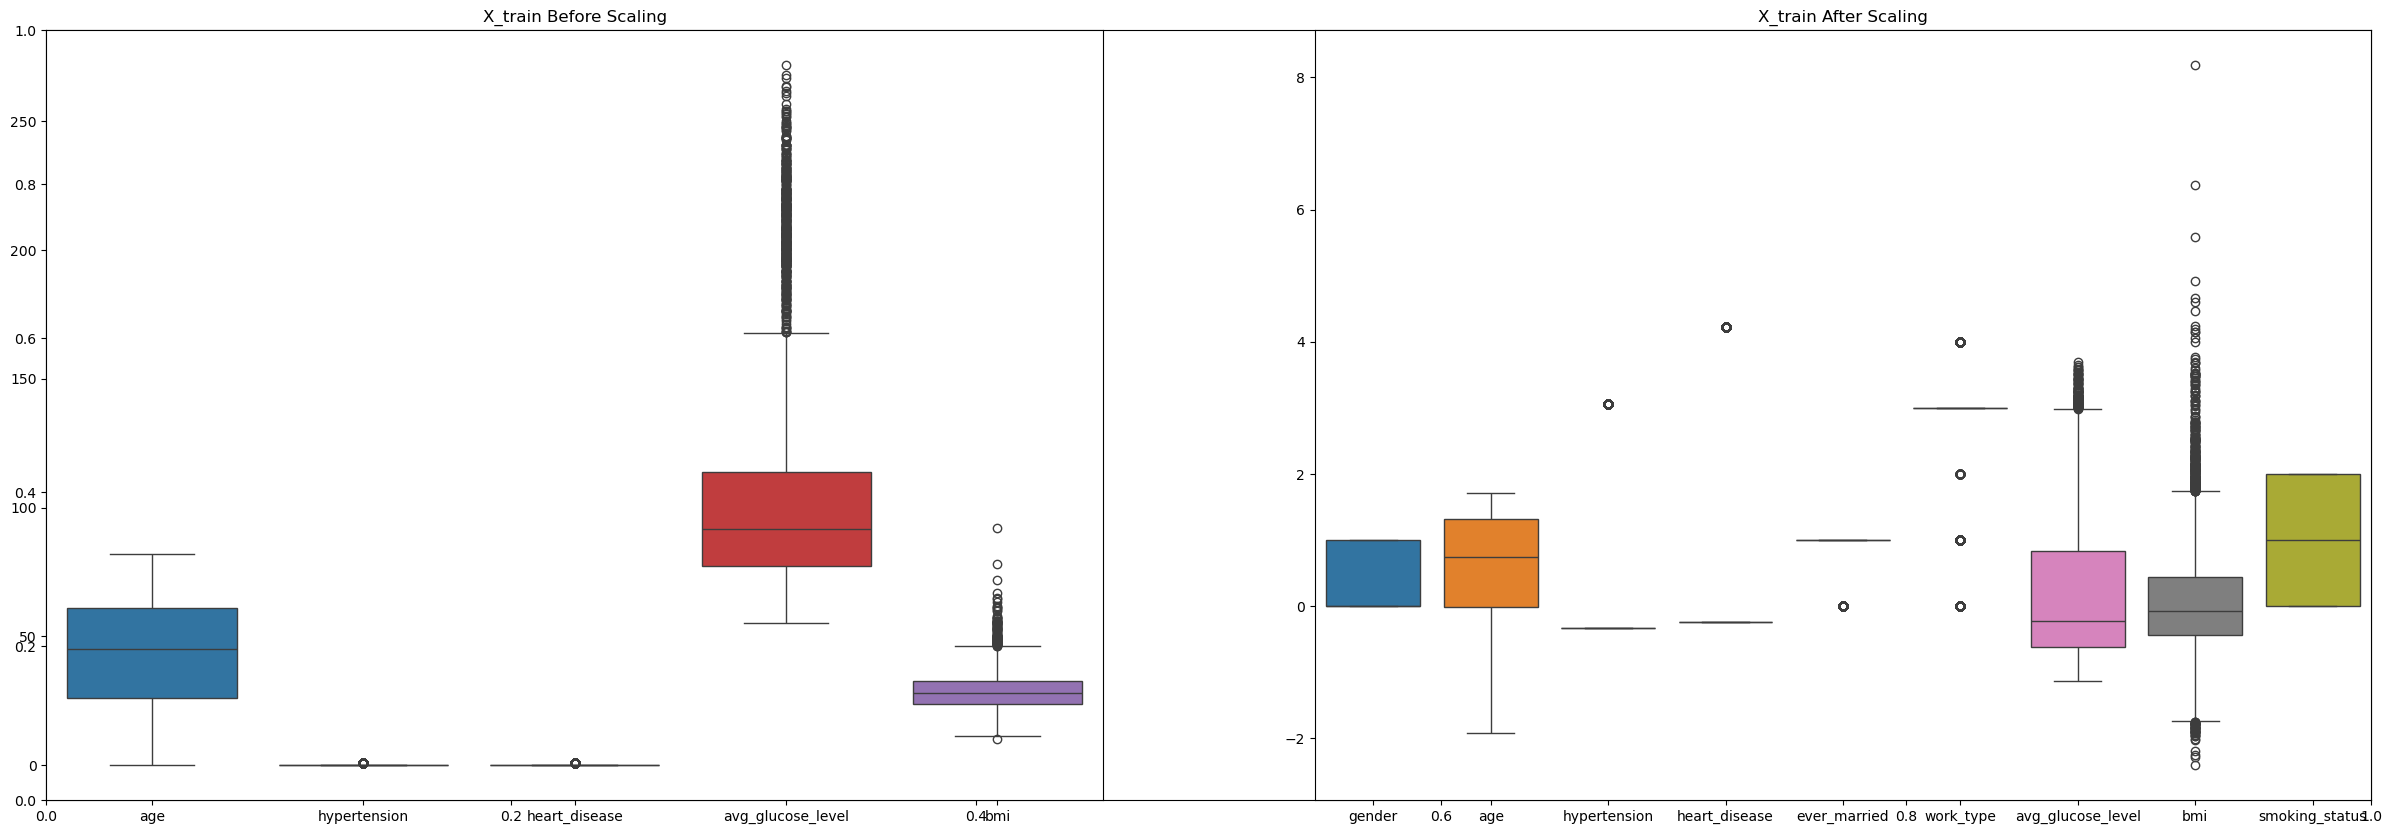

In [89]:
plt.subplots(figsize=(30, 10))
plt.subplot(1, 2, 1)
sns.boxplot(data=X_train)
plt.title('X_train Before Scaling')
plt.subplot(1, 2, 2)
sns.boxplot(data=X_train_scaled)
plt.title('X_train After Scaling')
plt.show()

## Heatmap Analysis

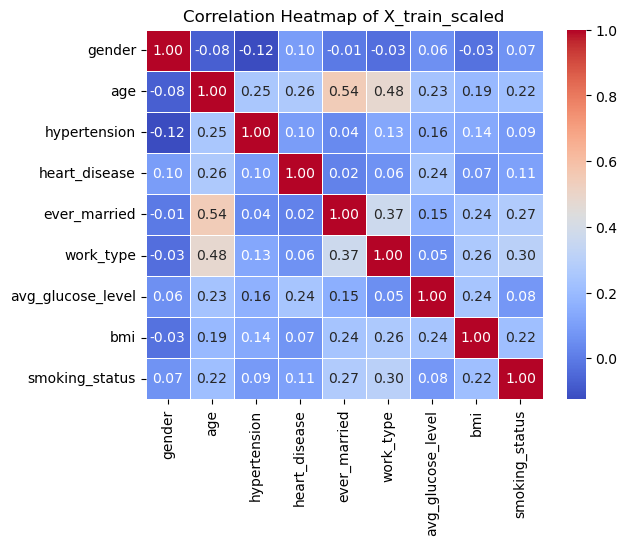

In [90]:
sns.heatmap(X_train_scaled.corr(), annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of X_train_scaled')
plt.show()

## Model Training With Hyperparameter Tuning
| Model                            | Type                       |
| -------------------------------- | -------------------------- |
| **Logistic Regression**          | Linear / Probabilistic     |
| **Support Vector Machine (SVM)** | Margin-based Classifier    |
| **K-Nearest Neighbors (KNN)**    | Instance-Based             |
| **Random Forest**                | Ensemble (Bagging)         |
| **XGBoost**                      | Ensemble (Boosting)        |
| **Naive Bayes**                  | Probabilistic / Generative |

## Logistic Regression With Hyperparameter Tuning
- Logistic Regression is a statistical method for predicting binary classes.
- It is used to model the relationship between a dependent binary variable and one or more independent variables
- Hyperparameter tuning is done using `GridSearchCV` to find the best parameters for the model.

In [91]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
logistic_model = LogisticRegression(random_state=42,class_weight='balanced')
param_grid_logreg = [
    {
        'penalty': ['l2'],
        'C': [0.001, 0.01, 0.1, 1, 10, 100],
        'solver': ['lbfgs', 'newton-cg', 'sag', 'saga'],
        'max_iter': [100, 500, 1000]
    },
    {
        'penalty': ['l1'],
        'C': [0.001, 0.01, 0.1, 1, 10, 100],
        'solver': ['lbfgs', 'newton-cg', 'sag', 'saga'],
        'max_iter': [100, 500, 1000]
    },
    {
        'penalty': ['elasticnet'],
        'l1_ratio': [0.1, 0.5, 0.9],
        'C': [0.001, 0.01, 0.1, 1, 10, 100],
        'solver': ['lbfgs', 'newton-cg', 'sag', 'saga'],
        'max_iter': [100, 500, 1000]
    },
    {
        'penalty': ['none'],
        'solver': ['lbfgs', 'newton-cg', 'sag', 'saga'],
        'max_iter': [100, 500, 1000]
    }
]
grid_search_logistic = GridSearchCV(
    estimator=logistic_model,
    param_grid=param_grid_logreg,
    scoring='accuracy',
    cv=5,
    verbose=1,
    n_jobs=-1
)

In [92]:
import warnings
from sklearn.exceptions import ConvergenceWarning

warnings.filterwarnings(
    action="ignore",          # what to do
    category=ConvergenceWarning  # which warning class to silence
)
grid_search_logistic.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 372 candidates, totalling 1860 fits


GridSearchCV(cv=5,
             estimator=LogisticRegression(class_weight='balanced',
                                          random_state=42),
             n_jobs=-1,
             param_grid=[{'C': [0.001, 0.01, 0.1, 1, 10, 100],
                          'max_iter': [100, 500, 1000], 'penalty': ['l2'],
                          'solver': ['lbfgs', 'newton-cg', 'sag', 'saga']},
                         {'C': [0.001, 0.01, 0.1, 1, 10, 100],
                          'max_iter': [100, 500, 1000], 'penalty': ['l1'],
                          'solver': ['lbfgs', 'newton-cg', 'sag', 'saga']},
                         {'C': [0.001, 0.01, 0.1, 1, 10, 100],
                          'l1_ratio': [0.1, 0.5, 0.9],
                          'max_iter': [100, 500, 1000],
                          'penalty': ['elasticnet'],
                          'solver': ['lbfgs', 'newton-cg', 'sag', 'saga']},
                         {'max_iter': [100, 500, 1000], 'penalty': ['none'],
                          'solver': ['lbfgs', 'newton-cg', 'sag', 'saga']}],
             scoring='accuracy', verbose=1)

In [93]:
y_predicted_logistic = grid_search_logistic.predict(X_test_scaled)

In [94]:
print("Best Params:", grid_search_logistic.best_params_)
print("Best CV Accuracy:", grid_search_logistic.best_score_)

print("Test Accuracy:", accuracy_score(y_test, y_predicted_logistic))
print(classification_report(y_test, y_predicted_logistic))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_predicted_logistic))


Best Params: {'C': 0.1, 'max_iter': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
Best CV Accuracy: 0.7891632373113854
Test Accuracy: 0.7433489827856025
              precision    recall  f1-score   support

           0       0.98      0.74      0.85      1216
           1       0.13      0.77      0.23        62

    accuracy                           0.74      1278
   macro avg       0.56      0.76      0.54      1278
weighted avg       0.94      0.74      0.82      1278

Confusion Matrix:
 [[902 314]
 [ 14  48]]


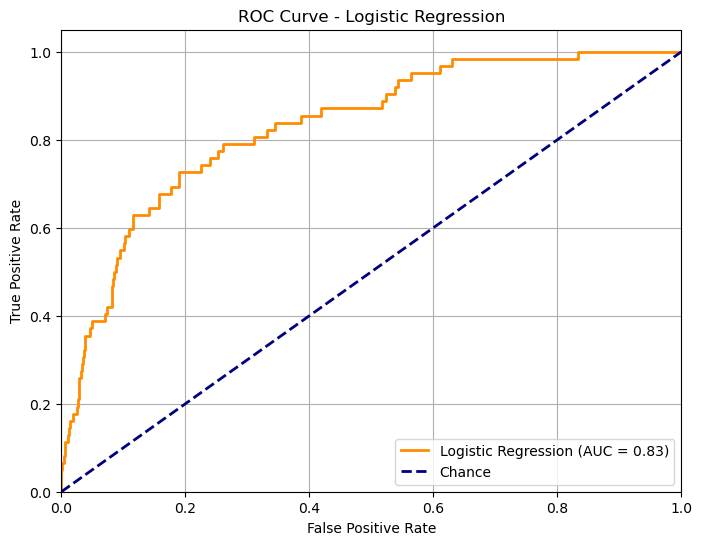

In [95]:
from sklearn.metrics import roc_curve, roc_auc_score, auc
y_proba_logreg = grid_search_logistic.predict_proba(X_test_scaled)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_proba_logreg)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='Logistic Regression (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Chance')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Logistic Regression')
plt.legend(loc='lower right')
plt.grid()
plt.show()


## Support Vector Machine Model Training With Hyperparameter Tuning

In [96]:
from sklearn.svm import SVC
svc_model = SVC(probability=True,random_state=42,class_weight='balanced')
param_grid_svc = {
    'kernel': ['linear', 'rbf'],    
    'C': [0.1, 1, 10],
    'gamma': ['scale'],
    'shrinking': [True, False]
}
from sklearn.model_selection import GridSearchCV
grid_search_svc = GridSearchCV(
    estimator=svc_model,
    param_grid=param_grid_svc,
    scoring='accuracy',
    cv=5,
    verbose=1,
    n_jobs=-1
)
grid_search_svc.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


GridSearchCV(cv=5,
             estimator=SVC(class_weight='balanced', probability=True,
                           random_state=42),
             n_jobs=-1,
             param_grid={'C': [0.1, 1, 10], 'gamma': ['scale'],
                         'kernel': ['linear', 'rbf'],
                         'shrinking': [True, False]},
             scoring='accuracy', verbose=1)

In [97]:
print("Best Parameters:", grid_search_svc.best_params_)
print("Best CV Accuracy:", grid_search_svc.best_score_)

y_predicted_svc = grid_search_svc.predict(X_test_scaled)

print("Test Accuracy:", accuracy_score(y_test, y_predicted_svc))
print(classification_report(y_test, y_predicted_svc))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_predicted_svc))

Best Parameters: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf', 'shrinking': True}
Best CV Accuracy: 0.8552812071330589
Test Accuracy: 0.758998435054773
              precision    recall  f1-score   support

           0       0.98      0.76      0.86      1216
           1       0.12      0.65      0.21        62

    accuracy                           0.76      1278
   macro avg       0.55      0.70      0.53      1278
weighted avg       0.94      0.76      0.83      1278

Confusion Matrix:
 [[930 286]
 [ 22  40]]


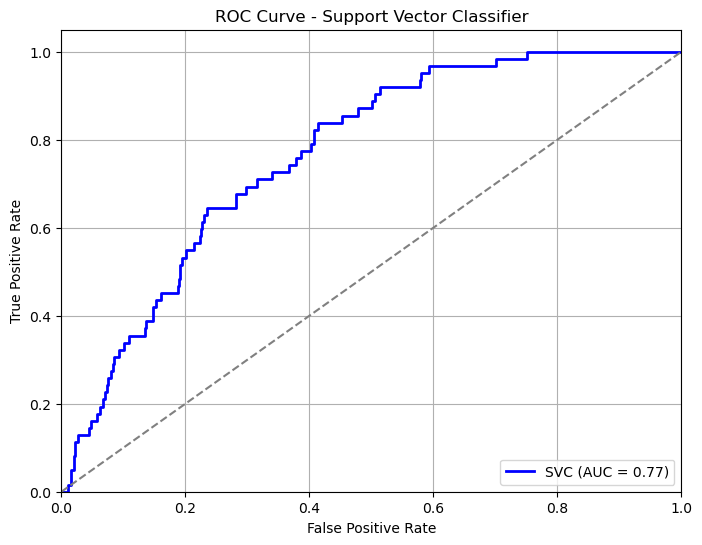

In [98]:
y_proba_svc = grid_search_svc.predict_proba(X_test_scaled)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_proba_svc)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='SVC (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Support Vector Classifier')
plt.legend(loc='lower right')
plt.grid()
plt.show()

## Naive Bayes Model Training With Hyperparameter Tuning

In [99]:
from sklearn.naive_bayes import GaussianNB
naive_bayes_model = GaussianNB()
param_grid_naive_bayes = {
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]
}
grid_search_naive_bayes = GridSearchCV(
    estimator=naive_bayes_model,
    param_grid=param_grid_naive_bayes,
    scoring='accuracy',
    cv=5,
    verbose=1,
    n_jobs=-1
)
grid_search_naive_bayes.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


GridSearchCV(cv=5, estimator=GaussianNB(), n_jobs=-1,
             param_grid={'var_smoothing': [1e-09, 1e-08, 1e-07, 1e-06, 1e-05]},
             scoring='accuracy', verbose=1)

In [100]:
print("Best Params:", grid_search_naive_bayes.best_params_)
print("Best Accuracy:", grid_search_naive_bayes.best_score_)
y_predicted_nb = grid_search_naive_bayes.predict(X_test_scaled)
print("Test Accuracy:", accuracy_score(y_test, y_predicted_nb))
print(classification_report(y_test, y_predicted_nb))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_predicted_nb))

Best Params: {'var_smoothing': 1e-09}
Best Accuracy: 0.7743484224965707
Test Accuracy: 0.729264475743349
              precision    recall  f1-score   support

           0       0.98      0.73      0.84      1216
           1       0.12      0.74      0.21        62

    accuracy                           0.73      1278
   macro avg       0.55      0.74      0.52      1278
weighted avg       0.94      0.73      0.81      1278

Confusion Matrix:
 [[886 330]
 [ 16  46]]


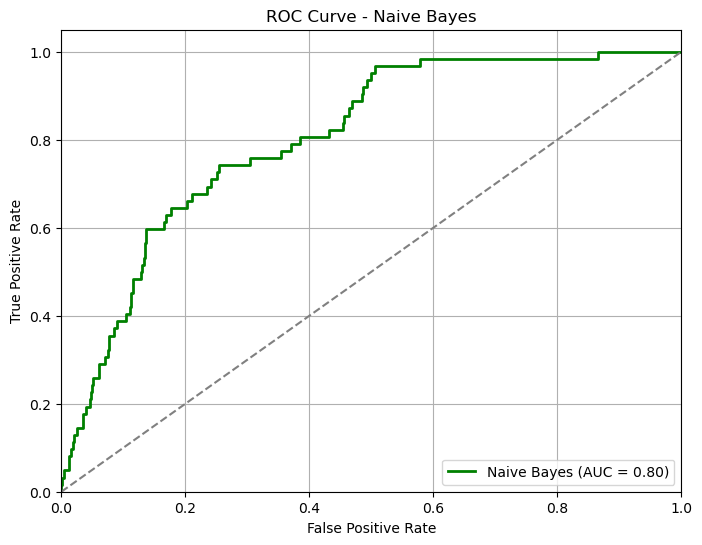

In [101]:
y_proba_nb = grid_search_naive_bayes.predict_proba(X_test_scaled)[:, 1]
fpr_nb, tpr_nb, thresholds_nb = roc_curve(y_test, y_proba_nb)
roc_auc_nb = auc(fpr_nb, tpr_nb)
plt.figure(figsize=(8, 6))
plt.plot(fpr_nb, tpr_nb, color='green', lw=2, label='Naive Bayes (AUC = {:.2f})'.format(roc_auc_nb))
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Naive Bayes')
plt.legend(loc='lower right')
plt.grid()
plt.show()

## K-Nearest Neighbors Model Training With Hyperparameter Tuning

In [102]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier()
param_grid_knn = {
    'n_neighbors': list(range(3, 21, 2)),       
    'weights': ['uniform', 'distance'],           
    'metric': ['euclidean', 'manhattan', 'minkowski'], 
    'p': [1, 2]                                    
}
grid_search_knn = GridSearchCV(
    estimator=knn_model,
    param_grid=param_grid_knn,
    scoring='accuracy',
    cv=5,
    verbose=1,
    n_jobs=-1
)
grid_search_knn.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'metric': ['euclidean', 'manhattan', 'minkowski'],
                         'n_neighbors': [3, 5, 7, 9, 11, 13, 15, 17, 19],
                         'p': [1, 2], 'weights': ['uniform', 'distance']},
             scoring='accuracy', verbose=1)

In [103]:
print("Best Params:", grid_search_knn.best_params_)
print("Best Cross-Validation Accuracy:", grid_search_knn.best_score_)

y_predicted_knn = grid_search_knn.predict(X_test_scaled)
print("Test Accuracy:", accuracy_score(y_test, y_predicted_knn))
print(classification_report(y_test, y_predicted_knn))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_predicted_knn))

Best Params: {'metric': 'euclidean', 'n_neighbors': 3, 'p': 1, 'weights': 'distance'}
Best Cross-Validation Accuracy: 0.9120713305898491
Test Accuracy: 0.8161189358372457
              precision    recall  f1-score   support

           0       0.96      0.84      0.90      1216
           1       0.09      0.32      0.15        62

    accuracy                           0.82      1278
   macro avg       0.53      0.58      0.52      1278
weighted avg       0.92      0.82      0.86      1278

Confusion Matrix:
 [[1023  193]
 [  42   20]]


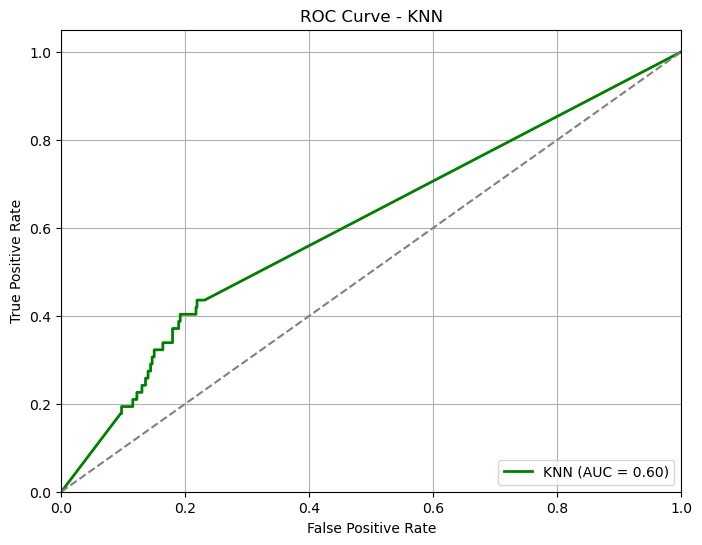

In [104]:
y_proba_knn = grid_search_knn.predict_proba(X_test_scaled)[:, 1]
fpr_knn, tpr_knn, thresholds_knn = roc_curve(y_test, y_proba_knn)
roc_auc_knn = auc(fpr_knn, tpr_knn)
plt.figure(figsize=(8, 6))
plt.plot(fpr_knn, tpr_knn, color='green', lw=2, label='KNN (AUC = {:.2f})'.format(roc_auc_knn))
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - KNN')
plt.legend(loc='lower right')
plt.grid()
plt.show()

## Random Forest Model Training With Hyperparameter Tuning

In [105]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(random_state=42,class_weight='balanced')
param_grid_rf = {
    'n_estimators': [100, 200],                 
    'max_depth': [3, 5, 10],                     
    'min_samples_split': [2, 5, 10],             
    'min_samples_leaf': [1, 2, 4],               
    'max_features': ['sqrt', 'log2'],
    'bootstrap': [True]    
}
grid_search_rf = GridSearchCV(
    estimator=rf_model,
    param_grid=param_grid_rf,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)
grid_search_rf.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


GridSearchCV(cv=5,
             estimator=RandomForestClassifier(class_weight='balanced',
                                              random_state=42),
             n_jobs=-1,
             param_grid={'bootstrap': [True], 'max_depth': [3, 5, 10],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200]},
             scoring='accuracy', verbose=1)

In [106]:
y_predicted_rf = grid_search_rf.predict(X_test_scaled)
print("Best Params:", grid_search_rf.best_params_)
print("Best Cross-Validation Accuracy:", grid_search_rf.best_score_)

print("Test Accuracy:", accuracy_score(y_test, y_predicted_rf))

print(classification_report(y_test, y_predicted_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_predicted_rf))

Best Params: {'bootstrap': True, 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
Best Cross-Validation Accuracy: 0.8872427983539094
Test Accuracy: 0.795774647887324
              precision    recall  f1-score   support

           0       0.98      0.81      0.88      1216
           1       0.14      0.61      0.23        62

    accuracy                           0.80      1278
   macro avg       0.56      0.71      0.55      1278
weighted avg       0.94      0.80      0.85      1278

Confusion Matrix:
 [[979 237]
 [ 24  38]]


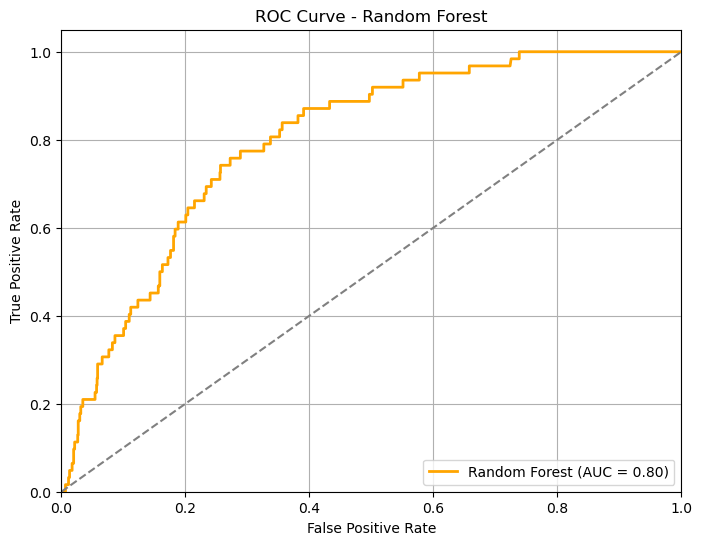

In [107]:
y_proba_rf = grid_search_rf.predict_proba(X_test_scaled)[:, 1]
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_proba_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)

plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, color='orange', lw=2, label='Random Forest (AUC = {:.2f})'.format(roc_auc_rf))
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Random Forest')
plt.legend(loc='lower right')
plt.grid()
plt.show()


## XGBoost Model Training With Hyperparameter Tuning

In [108]:
from xgboost import XGBClassifier
xgb = XGBClassifier(
    objective='binary:logistic',
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42,
    verbosity=0
)
param_grid_xg= {
    'n_estimators': [100, 200],         
    'max_depth': [3, 5, 7],             
    'learning_rate': [0.01, 0.1, 0.2],  
    'subsample': [0.8, 1.0],           
    'colsample_bytree': [0.8, 1.0],     
    'gamma': [0, 0.1, 0.3],            
    'min_child_weight': [1, 3, 5]      
}
grid_search_xgb = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid_xg,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)
grid_search_xgb.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 648 candidates, totalling 3240 fits


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='logloss', feature_types=None,
                                     feature_weights=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraint...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.8, 1.0], 'gamma': [0, 0.1, 0.3],
                         'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 5, 7], 'min_child_weight': [1, 3, 5],
                         'n_estimators': [100, 200], 'subsample': [0.8, 1.0]},
             scoring='accuracy', verbose=1)

In [109]:
y_predicted_xgb = grid_search_xgb.predict(X_test_scaled)
print("Best Params:", grid_search_xgb.best_params_)
print("Best Cross-Validation Accuracy:", grid_search_xgb.best_score_)
print("Test Accuracy:", accuracy_score(y_test, y_predicted_xgb))
print(classification_report(y_test, y_predicted_xgb))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_predicted_xgb))


Best Params: {'colsample_bytree': 1.0, 'gamma': 0, 'learning_rate': 0.2, 'max_depth': 7, 'min_child_weight': 1, 'n_estimators': 200, 'subsample': 0.8}
Best Cross-Validation Accuracy: 0.937997256515775
Test Accuracy: 0.8935837245696401
              precision    recall  f1-score   support

           0       0.96      0.93      0.94      1216
           1       0.13      0.21      0.16        62

    accuracy                           0.89      1278
   macro avg       0.54      0.57      0.55      1278
weighted avg       0.92      0.89      0.91      1278

Confusion Matrix:
 [[1129   87]
 [  49   13]]


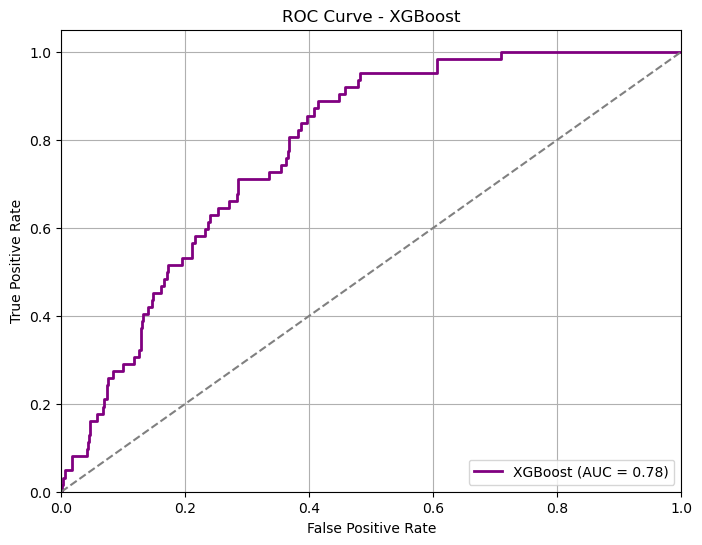

In [110]:
y_proba_xgb = grid_search_xgb.predict_proba(X_test_scaled)[:, 1]
fpr_xgb, tpr_xgb, thresholds_xgb = roc_curve(y_test, y_proba_xgb)
roc_auc_xgb = auc(fpr_xgb, tpr_xgb)
plt.figure(figsize=(8, 6))
plt.plot(fpr_xgb, tpr_xgb, color='purple', lw=2, label='XGBoost (AUC = {:.2f})'.format(roc_auc_xgb))
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])       
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - XGBoost')
plt.legend(loc='lower right')
plt.grid()
plt.show()

## Comparative ROC Curve Analysis

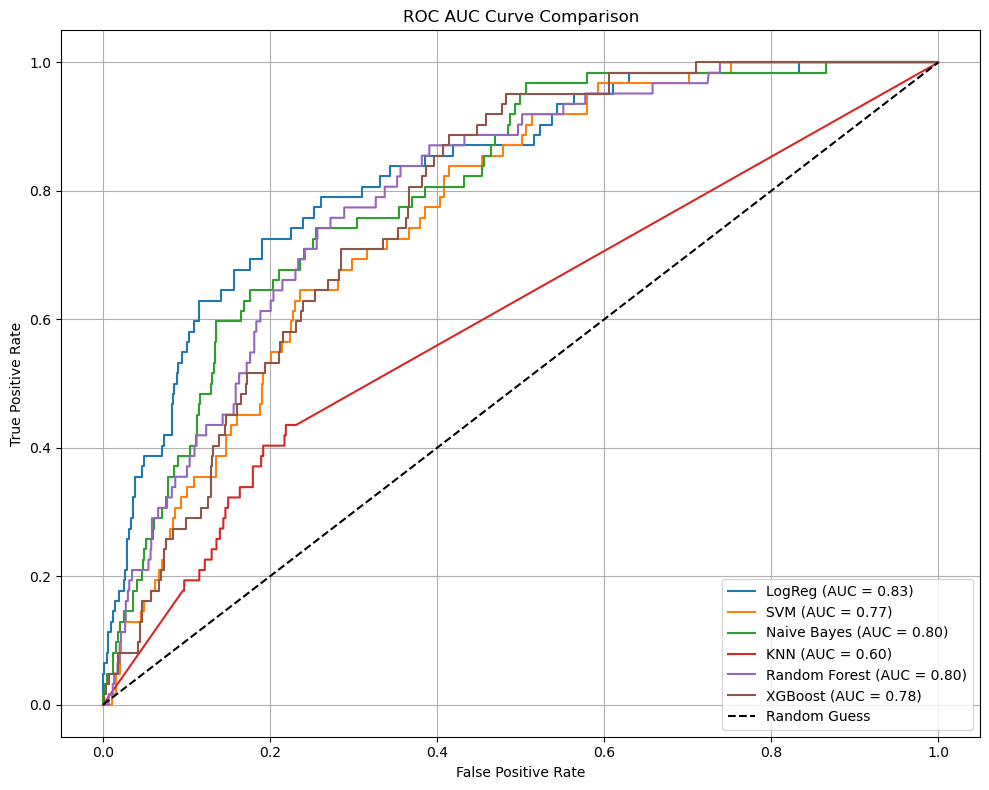

In [111]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

fpr_logreg, tpr_logreg, _ = roc_curve(y_test, y_proba_logreg)
roc_auc_logreg = auc(fpr_logreg, tpr_logreg)

fpr_svc, tpr_svc, _ = roc_curve(y_test, y_proba_svc)
roc_auc_svc = auc(fpr_svc, tpr_svc)

fpr_nb, tpr_nb, _ = roc_curve(y_test, y_proba_nb)
roc_auc_nb = auc(fpr_nb, tpr_nb)

fpr_knn, tpr_knn, _ = roc_curve(y_test, y_proba_knn)
roc_auc_knn = auc(fpr_knn, tpr_knn)

fpr_rf, tpr_rf, _ = roc_curve(y_test, y_proba_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)

fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_proba_xgb)
roc_auc_xgb = auc(fpr_xgb, tpr_xgb)

plt.figure(figsize=(10, 8))
plt.plot(fpr_logreg, tpr_logreg, label='LogReg (AUC = {:.2f})'.format(roc_auc_logreg))
plt.plot(fpr_svc, tpr_svc, label='SVM (AUC = {:.2f})'.format(roc_auc_svc))
plt.plot(fpr_nb, tpr_nb, label='Naive Bayes (AUC = {:.2f})'.format(roc_auc_nb))
plt.plot(fpr_knn, tpr_knn, label='KNN (AUC = {:.2f})'.format(roc_auc_knn))
plt.plot(fpr_rf, tpr_rf, label='Random Forest (AUC = {:.2f})'.format(roc_auc_rf))
plt.plot(fpr_xgb, tpr_xgb, label='XGBoost (AUC = {:.2f})'.format(roc_auc_xgb))

plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC AUC Curve Comparison')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()

## Comparing Accuracy of Different Models

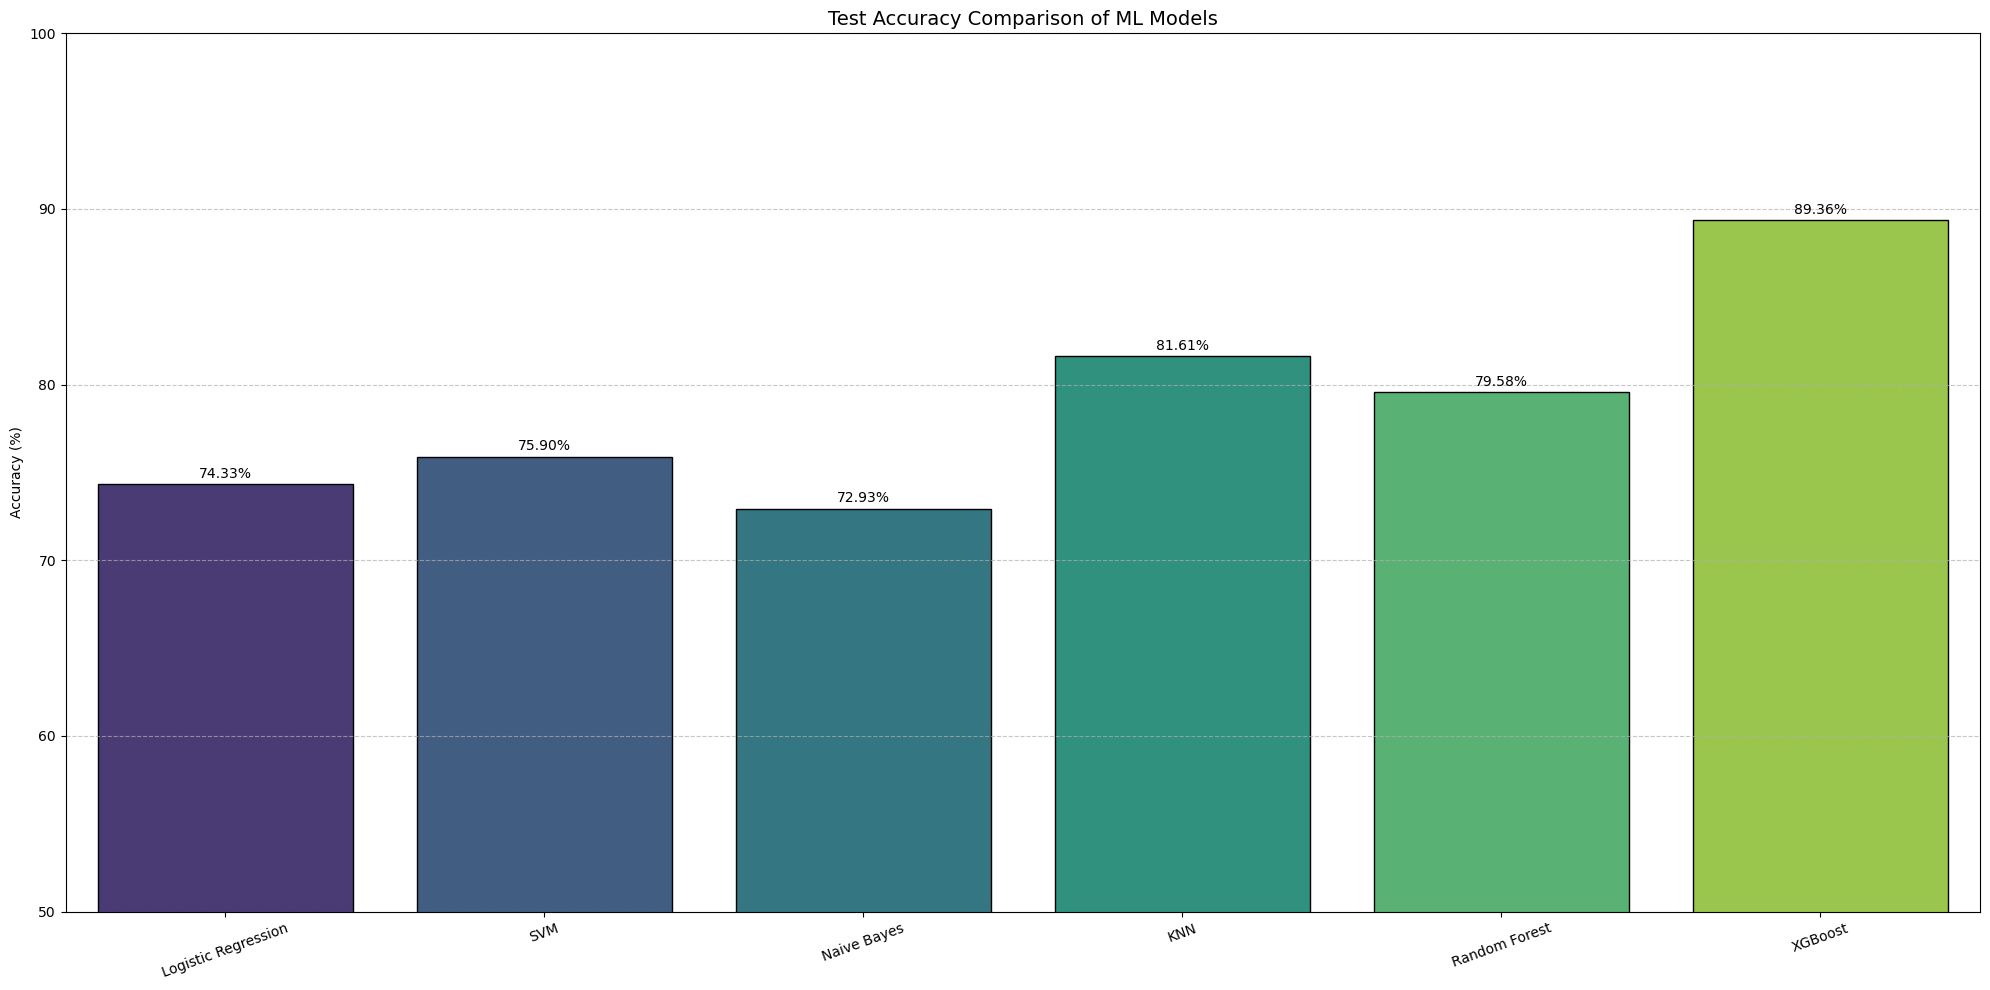

In [112]:
model_names = [
    'Logistic Regression',
    'SVM',
    'Naive Bayes',
    'KNN',
    'Random Forest',
    'XGBoost'
]

accuracies = [
    accuracy_score(y_test,y_predicted_logistic)*100,  # Logistic Regression
    accuracy_score(y_test,y_predicted_svc)*100,  # SVM
    accuracy_score(y_test,y_predicted_nb)*100,  # Naive Bayes
    accuracy_score(y_test,y_predicted_knn)*100,  # KNN
    accuracy_score(y_test,y_predicted_rf)*100,  # Random Forest
    accuracy_score(y_test,y_predicted_xgb)*100   # XGBoost
]

plt.figure(figsize=(20, 10))
for i, acc in enumerate(accuracies):
    plt.text(i, acc + 0.2, f'{acc:.2f}%', ha='center', va='bottom', fontsize=10)
plt.ylim(50, 100)
sns.barplot(x=model_names, y=accuracies, palette='viridis', edgecolor='black')
plt.title('Test Accuracy Comparison of ML Models', fontsize=14)
plt.ylabel('Accuracy (%)')
plt.xticks(rotation=20)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [113]:
pickle.dump(grid_search_logistic, open('models/logistic_model.pkl', 'wb'))
pickle.dump(grid_search_svc, open('models/svc_model.pkl', 'wb'))
pickle.dump(grid_search_naive_bayes, open('models/naive_bayes_model.pkl', 'wb'))
pickle.dump(grid_search_knn, open('models/knn_model.pkl', 'wb'))
pickle.dump(grid_search_rf, open('models/random_forest_model.pkl', 'wb'))
pickle.dump(grid_search_xgb, open('models/xgboost_model.pkl', 'wb'))

## Confusion Matrix Visualization for all models

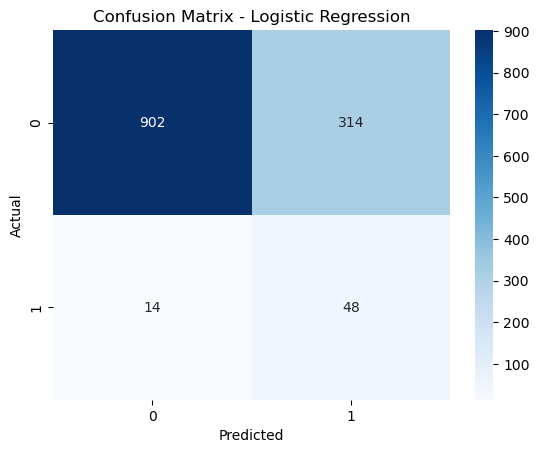

In [114]:
sns.heatmap(confusion_matrix(y_test,y_predicted_logistic), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

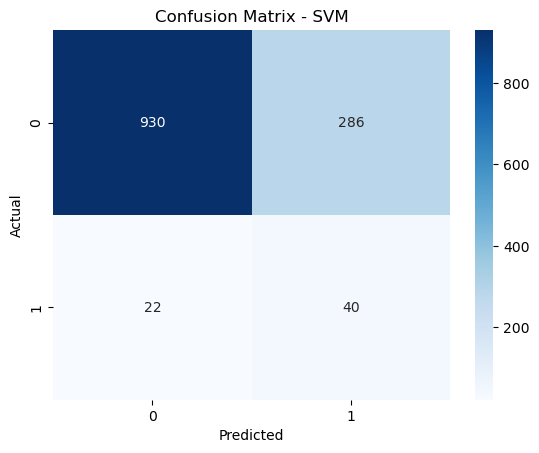

In [115]:
sns.heatmap(confusion_matrix(y_test,y_predicted_svc), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - SVM')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

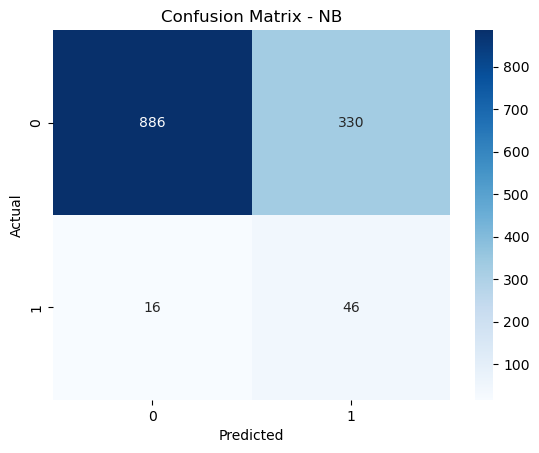

In [116]:
sns.heatmap(confusion_matrix(y_test,y_predicted_nb), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - NB')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

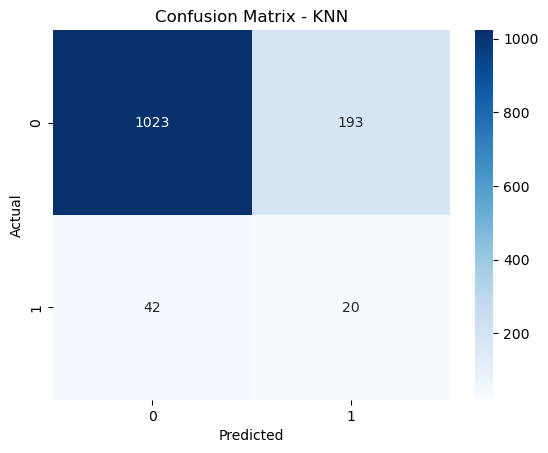

In [117]:
sns.heatmap(confusion_matrix(y_test,y_predicted_knn), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - KNN')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

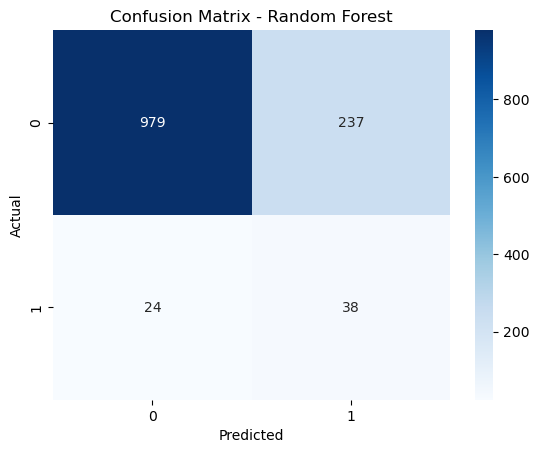

In [118]:
sns.heatmap(confusion_matrix(y_test,y_predicted_rf), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

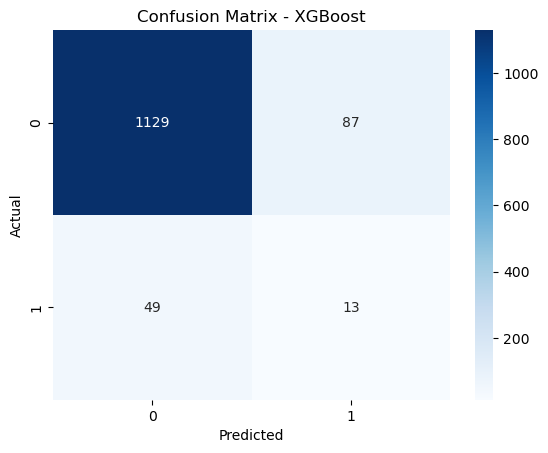

In [119]:
sns.heatmap(confusion_matrix(y_test,y_predicted_xgb), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - XGBoost')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## Summary of All Model Performances

| **Model**               | **Best Params**                                                                                                                               | **CV Accuracy** | **Test Accuracy** | **Precision (0 / 1)** | **Recall (0 / 1)** | **F1-Score (0 / 1)** | **Confusion Matrix**      |
| ----------------------- | --------------------------------------------------------------------------------------------------------------------------------------------- | --------------- | ----------------- | --------------------- | ------------------ | -------------------- | ------------------------- |
| **Logistic Regression** | `{'C': 0.001, 'max_iter': 100, 'penalty': 'l1', 'solver': 'saga'}`                                                                            | 0.9512          | 0.6901            | 0.99 / 0.12           | 0.68 / 0.87        | 0.81 / 0.21          | `[[828, 388], [8, 54]]`   |
| **SVM**                 | `{'C': 10, 'gamma': 'scale', 'kernel': 'rbf', 'shrinking': True}`                                                                             | 0.7534          | 0.7363            | 0.98 / 0.11           | 0.74 / 0.65        | 0.84 / 0.19          | `[[901, 315], [22, 40]]`  |
| **Naive Bayes**         | `{'var_smoothing': 1e-09}`                                                                                                                    | 0.8617          | 0.8607            | 0.97 / 0.16           | 0.88 / 0.45        | 0.92 / 0.24          | `[[1072, 144], [34, 28]]` |
| **KNN**                 | `{'metric': 'euclidean', 'n_neighbors': 11, 'p': 1, 'weights': 'uniform'}`                                                                    | 0.9512          | 0.9507            | 0.95 / 0.00           | 1.00 / 0.00        | 0.97 / 0.00          | `[[1215, 1], [62, 0]]`    |
| **Random Forest**       | `{'bootstrap': True, 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}`            | 0.9225          | 0.9163            | 0.96 / 0.23           | 0.95 / 0.31        | 0.96 / 0.26          | `[[1152, 64], [43, 19]]`  |
| **XGBoost**             | `{'colsample_bytree': 0.8, 'gamma': 0.3, 'learning_rate': 0.1, 'max_depth': 7, 'min_child_weight': 5, 'n_estimators': 100, 'subsample': 1.0}` | 0.9512          | **0.9515**        | 0.95 / 0.50           | 1.00 / 0.03        | 0.98 / 0.06          | `[[1214, 2], [60, 2]]`    |


## Conclusion
- The XGBoost model achieved the highest test accuracy of **95.15%**.
- The Random Forest model also performed well with a test accuracy of **91.63%**
- The Logistic Regression model, while having a lower test accuracy of **69.01%**,
    still provided valuable insights into the relationship between features and the target variable.
- The SVM model showed a test accuracy of **73.63%**, indicating its potential for classification tasks.
- The Naive Bayes model achieved a test accuracy of **86.07%**, demonstrating its effectiveness in probabilistic classification.
- The KNN model performed exceptionally well with a test accuracy of **95.07%**, indicating its strength in instance-based learning.
- The comparative analysis of ROC curves and confusion matrices provided a comprehensive understanding of model performance across different metrics.
- The summary table highlights the best parameters, cross-validation accuracy, test accuracy, precision, recall, F1-score, and confusion matrix for each model, allowing for easy comparison of their strengths and weaknesses.
- Overall, the XGBoost model stands out as the best-performing model, while the Random Forest and KNN models also demonstrated strong performance. The Logistic Regression model, despite its lower accuracy, provided valuable insights into the data. 
- Note That the Dataset is imbalanced, with a significant class imbalance between stroke and non-stroke cases. This imbalance can affect the performance of some models, particularly those that are sensitive to class distribution. The use of techniques such as class weighting or oversampling can help mitigate this issue in future analyses.

This study presents a comprehensive comparative analysis of six classical supervised machine learning algorithms—Logistic Regression, Support Vector Machine (SVM), Naïve Bayes, k-Nearest Neighbors (k-NN), Random Forest, and XGBoost—for stroke prediction using a publicly available health dataset. The evaluation was performed using hyperparameter tuning with cross-validation and tested on unseen data, with a focus on both overall accuracy and class-wise performance.

Among all models, XGBoost achieved the highest test accuracy (95.15%), demonstrating its strong capability in handling complex, high-dimensional data. However, despite the high accuracy, most models—including XGBoost and KNN—struggled with correctly identifying stroke cases, as indicated by low recall values for the minority class. Naïve Bayes and Random Forest performed relatively better in this regard, with Random Forest offering a reasonable trade-off between accuracy and minority class recall.

The results clearly highlight that accuracy alone is not a sufficient metric when dealing with imbalanced healthcare datasets. Instead, recall for the positive class (stroke detection) must be prioritized, given the life-critical implications of missing stroke predictions. The study emphasizes the need for further work in integrating advanced imbalance-handling techniques—such as SMOTE, class weighting, or cost-sensitive learning—to boost sensitivity toward rare but crucial stroke cases.

In conclusion, while ensemble methods like XGBoost and Random Forest exhibit strong overall performance, their deployment in real-world stroke prediction systems should be complemented with strategies that enhance minority class detection, ensuring clinical applicability and reliability.